# 学習メモ

In [ ]:
・クラスタリングとは目的関数を設定し、最大化（最小化）するパラメータを探索する教師なし学習の手法である
・クラスタリングの良さを目的関数として定式化する


# 演習

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import xgboost as xgb
warnings.filterwarnings('ignore')
 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [3]:
k_data = pd.read_csv("week8cluster.csv", header=None)

In [4]:
k_data.head()

,0,1
0,5.798165,4.811611
1,5.694314,4.367983
2,7.154786,4.325657
3,3.835942,3.316601
4,4.018064,3.288468


In [5]:
data = np.array(k_data)

In [6]:
data_new = data[:,1]

In [7]:
data_new[]

SyntaxError: invalid syntax (<ipython-input-7-4061f4b1e190>, line 1)

In [8]:
data = np.loadtxt("week8cluster.csv",delimiter=",")

In [9]:
d_size, n_features = data.shape
num_class = 3
max_iter = 200

In [10]:
centroids = data[np.random.choice(d_size, num_class)]
new_centroids = np.zeros((num_class, n_features))
cluster = np.zeros(d_size)

In [11]:
print(new_centroids)
print(centroids)
print(cluster)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[1.37865158 0.06254306]
 [3.91075627 8.52814879]
 [2.95911815 8.97435568]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [17]:
    
def k_means(num_class,data):
        d_size, n_features = data.shape
        centroids = data[np.random.choice(d_size, num_class)]
        new_centroids = np.zeros((num_class, n_features))
        cluster = np.zeros(d_size)
        max_iter = 300

        for epoch in range(max_iter):

            for i in range(d_size):
                distances = np.sum((centroids - data[i]) ** 2, axis=1)
                print(distances)
                cluster[i] = np.argsort(distances)[0]
                

            for j in range(num_class):
                new_centroids[j] = data[cluster==j].mean(axis=0)

            if np.sum(new_centroids == centroids) ==num_class:
                break
            centroids = new_centroids

        return cluster



In [20]:
d_size, n_features = data.shape
centroids = data[np.random.choice(d_size, num_class)]
new_centroids = np.zeros((num_class, n_features))
cluster = np.zeros(d_size)
max_iter = 300

for epoch in range(max_iter):

    for i in range(d_size):
            distances = np.sum((centroids - data[i]) ** 2, axis=1)
            print(distances)
            cluster[i] = np.argsort(distances)[0]
                

for j in range(num_class):
    new_centroids[j] = data[cluster==j].mean(axis=0)

    if np.sum(new_centroids == centroids) ==num_class:
        break
    centroids = new_centroids




[49.89133238 54.54628708 50.44745483]
[54.7587905  49.26304053 45.22854746]
[67.59622685 66.8752657  61.65555088]
[60.14104476 24.29111214 21.71540783]
[61.19051905 25.43397367 22.70945109]
[63.20142873 30.50219306 27.29446943]
[57.99629801 26.05206471 23.41277067]
[57.21664466 32.44641367 29.32716863]
[61.69872301 39.41773687 35.67412004]
[67.48042702 21.07739706 18.50437434]
[47.88012348 44.78975317 41.28095216]
[56.06567496 26.00415229 23.46098607]
[45.97629775 57.4199475  53.35687334]
[69.58017383 19.28481552 16.81192585]
[53.33606588 64.84674712 60.17420413]
[70.79083419 57.69659242 52.7601007 ]
[89.57452281  8.82774022  7.00096761]
[45.39230412 41.24260129 38.06914323]
[65.06348967 13.38716538 11.89698105]
[48.11604734 39.24125002 36.06122867]
[63.15109079 38.05439045 34.34414735]
[50.98111522 77.755241   72.71265028]
[48.72036014 26.15113131 24.01418939]
[51.32838748 27.59468905 25.15324453]
[45.50337604 54.30037053 50.4030493 ]
[46.68237748 62.5584313  58.24396254]
[57.68113442

[54.7587905  49.26304053 45.22854746]
[67.59622685 66.8752657  61.65555088]
[60.14104476 24.29111214 21.71540783]
[61.19051905 25.43397367 22.70945109]
[63.20142873 30.50219306 27.29446943]
[57.99629801 26.05206471 23.41277067]
[57.21664466 32.44641367 29.32716863]
[61.69872301 39.41773687 35.67412004]
[67.48042702 21.07739706 18.50437434]
[47.88012348 44.78975317 41.28095216]
[56.06567496 26.00415229 23.46098607]
[45.97629775 57.4199475  53.35687334]
[69.58017383 19.28481552 16.81192585]
[53.33606588 64.84674712 60.17420413]
[70.79083419 57.69659242 52.7601007 ]
[89.57452281  8.82774022  7.00096761]
[45.39230412 41.24260129 38.06914323]
[65.06348967 13.38716538 11.89698105]
[48.11604734 39.24125002 36.06122867]
[63.15109079 38.05439045 34.34414735]
[50.98111522 77.755241   72.71265028]
[48.72036014 26.15113131 24.01418939]
[51.32838748 27.59468905 25.15324453]
[45.50337604 54.30037053 50.4030493 ]
[46.68237748 62.5584313  58.24396254]
[57.68113442 42.71694979 38.92362152]
[53.87065093

[56.93691859 49.75161625 45.61239851]
[59.72620715 35.91890921 32.46319789]
[58.59146351 29.00149137 26.08730139]
[62.90896076 34.06027988 30.6135695 ]
[68.91328181 55.02563196 50.25860556]
[54.0462805  37.7968153  34.44275994]
[31.57030606 90.7690127  86.26315786]
[63.73337888 20.37120137 18.02412414]
[56.64016525 29.77729715 26.88529423]
[72.4918974  30.02391842 26.55446324]
[64.36930442 27.91352714 24.86010835]
[48.76047169 39.16765443 35.96134733]
[71.98380554 24.70743969 21.65782677]
[61.97792698 27.03264672 24.140183  ]
[50.80827845 43.10151018 39.55971902]
[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.64147313   0.63455899   0.97562799]
[110.13104943   0.79159193   1.35477018]
[149.32910071   2.44250665   1.74191423]
[113.75253833   0.79761562   1.49948926]
[134.64484443   0.77094522   0.35687173]
[137.44536303   0.83140558   1.63810789]
[136.24717643   0.37482268   0.31919094]
[145.66387017   0.94189583   0.92084439]
[124.44848428   0.        

[1.28649152e+02 1.84250310e-01 5.25957306e-02]
[135.59813815   0.51165912   1.15248423]
[ 3.0408223  92.43270395 92.26832549]
[13.51723017 56.26570148 55.43166094]
[  1.9902937  156.30482954 154.88753469]
[  0.6549894  114.3390417  112.93541718]
[  0.61929487 140.33424738 139.02671165]
[ 4.08746506 98.12298771 98.53175982]
[ 3.53361207 87.96431903 86.75923471]
[ 2.14096207 96.77707878 96.46076989]
[  1.77800485 121.45622856 119.48950394]
[  1.81463368 152.12401748 151.63604169]
[ 4.26024444 89.26786226 87.65517748]
[11.56611362 60.15872799 59.49727236]
[  1.27192643 105.95422119 104.55133421]
[  1.85285949 123.9783036  121.96777894]
[ 2.13204972 94.25262987 93.32159854]
[  0.         124.44848428 123.52105691]
[  0.28570724 113.28159318 112.52449362]
[  5.96170039 109.1184193  110.09482129]
[10.25125757 64.36376776 64.19569446]
[ 2.95679842 90.92668627 89.73030502]
[  0.55116521 108.52958788 107.61081622]
[  1.06304453 102.51154788 101.70026652]
[  1.06675308 143.79657517 143.29545398]

[122.46823879   0.61575231   1.39410299]
[120.93517184   2.36989682   3.73046645]
[123.52105691   0.16462024   0.        ]
[115.19245835   1.18355999   2.09354149]
[113.61957968   0.73043525   0.29679819]
[153.89307181   2.17991659   1.79667735]
[119.29647654   0.92995645   1.81302827]
[100.1078651    1.32309564   1.37322828]
[1.28649152e+02 1.84250310e-01 5.25957306e-02]
[135.59813815   0.51165912   1.15248423]
[ 3.0408223  92.43270395 92.26832549]
[13.51723017 56.26570148 55.43166094]
[  1.9902937  156.30482954 154.88753469]
[  0.6549894  114.3390417  112.93541718]
[  0.61929487 140.33424738 139.02671165]
[ 4.08746506 98.12298771 98.53175982]
[ 3.53361207 87.96431903 86.75923471]
[ 2.14096207 96.77707878 96.46076989]
[  1.77800485 121.45622856 119.48950394]
[  1.81463368 152.12401748 151.63604169]
[ 4.26024444 89.26786226 87.65517748]
[11.56611362 60.15872799 59.49727236]
[  1.27192643 105.95422119 104.55133421]
[  1.85285949 123.9783036  121.96777894]
[ 2.13204972 94.25262987 93.321

[45.97629775 57.4199475  53.35687334]
[69.58017383 19.28481552 16.81192585]
[53.33606588 64.84674712 60.17420413]
[70.79083419 57.69659242 52.7601007 ]
[89.57452281  8.82774022  7.00096761]
[45.39230412 41.24260129 38.06914323]
[65.06348967 13.38716538 11.89698105]
[48.11604734 39.24125002 36.06122867]
[63.15109079 38.05439045 34.34414735]
[50.98111522 77.755241   72.71265028]
[48.72036014 26.15113131 24.01418939]
[51.32838748 27.59468905 25.15324453]
[45.50337604 54.30037053 50.4030493 ]
[46.68237748 62.5584313  58.24396254]
[57.68113442 42.71694979 38.92362152]
[53.87065093 44.67208573 40.91443426]
[48.84900337 24.14815571 22.23198291]
[52.91306754 54.32212151 50.11338771]
[66.13806822 19.28200737 16.94657134]
[56.30924578 36.09562386 32.7599726 ]
[58.17527774 27.01627307 24.2843882 ]
[56.93691859 49.75161625 45.61239851]
[59.72620715 35.91890921 32.46319789]
[58.59146351 29.00149137 26.08730139]
[62.90896076 34.06027988 30.6135695 ]
[68.91328181 55.02563196 50.25860556]
[54.0462805 

[61.97792698 27.03264672 24.140183  ]
[50.80827845 43.10151018 39.55971902]
[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.64147313   0.63455899   0.97562799]
[110.13104943   0.79159193   1.35477018]
[149.32910071   2.44250665   1.74191423]
[113.75253833   0.79761562   1.49948926]
[134.64484443   0.77094522   0.35687173]
[137.44536303   0.83140558   1.63810789]
[136.24717643   0.37482268   0.31919094]
[145.66387017   0.94189583   0.92084439]
[124.44848428   0.           0.16462024]
[121.47672273   0.64599146   1.42886925]
[116.53356592   0.13239544   0.30036478]
[1.30851720e+02 8.05091336e-02 2.84292765e-01]
[1.29226723e+02 1.13660922e-01 5.11799788e-01]
[1.26690104e+02 5.18609228e-01 1.14027062e-01]
[160.29964444   3.25159705   2.70799506]
[173.37954454   4.3778176    4.23470103]
[137.45735267   0.49013721   1.04696565]
[144.03060385   1.00141546   0.80059583]
[1.27354096e+02 8.64430327e-02 4.95809319e-02]
[106.31608017   0.94406916   0.65319979]
[153

[133.68800192   0.33896434   0.20104217]
[116.63063926   4.19777054   5.90206791]
[116.27673241   0.654698     0.21201649]
[86.77089082  5.98898297  7.14551488]
[135.58390878   0.95985314   1.86759943]
[1.17771797e+02 1.40731393e-01 1.00125578e-01]
[108.58736533   0.84686915   1.36903902]
[137.29622642   2.19722574   3.53902232]
[139.40672284   0.84523546   0.5343433 ]
[103.30503994   2.60881414   3.64770494]
[133.37993319   1.1509413    0.532428  ]
[1.21806659e+02 1.66250191e-02 1.29891032e-01]
[118.18668181   1.25764088   0.52765699]
[133.66001352   0.59225117   0.25852889]
[150.74110913   1.91545128   1.50270016]
[99.39201636  2.2458709   2.98758953]
[122.46823879   0.61575231   1.39410299]
[120.93517184   2.36989682   3.73046645]
[123.52105691   0.16462024   0.        ]
[115.19245835   1.18355999   2.09354149]
[113.61957968   0.73043525   0.29679819]
[153.89307181   2.17991659   1.79667735]
[119.29647654   0.92995645   1.81302827]
[100.1078651    1.32309564   1.37322828]
[1.2864915

[120.93517184   2.36989682   3.73046645]
[123.52105691   0.16462024   0.        ]
[115.19245835   1.18355999   2.09354149]
[113.61957968   0.73043525   0.29679819]
[153.89307181   2.17991659   1.79667735]
[119.29647654   0.92995645   1.81302827]
[100.1078651    1.32309564   1.37322828]
[1.28649152e+02 1.84250310e-01 5.25957306e-02]
[135.59813815   0.51165912   1.15248423]
[ 3.0408223  92.43270395 92.26832549]
[13.51723017 56.26570148 55.43166094]
[  1.9902937  156.30482954 154.88753469]
[  0.6549894  114.3390417  112.93541718]
[  0.61929487 140.33424738 139.02671165]
[ 4.08746506 98.12298771 98.53175982]
[ 3.53361207 87.96431903 86.75923471]
[ 2.14096207 96.77707878 96.46076989]
[  1.77800485 121.45622856 119.48950394]
[  1.81463368 152.12401748 151.63604169]
[ 4.26024444 89.26786226 87.65517748]
[11.56611362 60.15872799 59.49727236]
[  1.27192643 105.95422119 104.55133421]
[  1.85285949 123.9783036  121.96777894]
[ 2.13204972 94.25262987 93.32159854]
[  0.         124.44848428 123.521

[  4.60834313 111.57525108 109.11456414]
[  0.4949677  109.55899524 108.58656021]
[ 5.02185696 90.84458085 88.94039447]
[3.68843162e-02 1.20308383e+02 1.19364773e+02]
[ 9.91867681 64.57533944 63.6595722 ]
[49.89133238 54.54628708 50.44745483]
[54.7587905  49.26304053 45.22854746]
[67.59622685 66.8752657  61.65555088]
[60.14104476 24.29111214 21.71540783]
[61.19051905 25.43397367 22.70945109]
[63.20142873 30.50219306 27.29446943]
[57.99629801 26.05206471 23.41277067]
[57.21664466 32.44641367 29.32716863]
[61.69872301 39.41773687 35.67412004]
[67.48042702 21.07739706 18.50437434]
[47.88012348 44.78975317 41.28095216]
[56.06567496 26.00415229 23.46098607]
[45.97629775 57.4199475  53.35687334]
[69.58017383 19.28481552 16.81192585]
[53.33606588 64.84674712 60.17420413]
[70.79083419 57.69659242 52.7601007 ]
[89.57452281  8.82774022  7.00096761]
[45.39230412 41.24260129 38.06914323]
[65.06348967 13.38716538 11.89698105]
[48.11604734 39.24125002 36.06122867]
[63.15109079 38.05439045 34.3441473

[48.76047169 39.16765443 35.96134733]
[71.98380554 24.70743969 21.65782677]
[61.97792698 27.03264672 24.140183  ]
[50.80827845 43.10151018 39.55971902]
[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.64147313   0.63455899   0.97562799]
[110.13104943   0.79159193   1.35477018]
[149.32910071   2.44250665   1.74191423]
[113.75253833   0.79761562   1.49948926]
[134.64484443   0.77094522   0.35687173]
[137.44536303   0.83140558   1.63810789]
[136.24717643   0.37482268   0.31919094]
[145.66387017   0.94189583   0.92084439]
[124.44848428   0.           0.16462024]
[121.47672273   0.64599146   1.42886925]
[116.53356592   0.13239544   0.30036478]
[1.30851720e+02 8.05091336e-02 2.84292765e-01]
[1.29226723e+02 1.13660922e-01 5.11799788e-01]
[1.26690104e+02 5.18609228e-01 1.14027062e-01]
[160.29964444   3.25159705   2.70799506]
[173.37954454   4.3778176    4.23470103]
[137.45735267   0.49013721   1.04696565]
[144.03060385   1.00141546   0.80059583]
[1.27354096e+02 

[106.31608017   0.94406916   0.65319979]
[153.22768336   4.86355256   3.58056547]
[93.54360628  3.23889253  4.01662028]
[96.64998251  1.77250718  1.70591196]
[126.91206431   0.72719803   1.5835034 ]
[133.68800192   0.33896434   0.20104217]
[116.63063926   4.19777054   5.90206791]
[116.27673241   0.654698     0.21201649]
[86.77089082  5.98898297  7.14551488]
[135.58390878   0.95985314   1.86759943]
[1.17771797e+02 1.40731393e-01 1.00125578e-01]
[108.58736533   0.84686915   1.36903902]
[137.29622642   2.19722574   3.53902232]
[139.40672284   0.84523546   0.5343433 ]
[103.30503994   2.60881414   3.64770494]
[133.37993319   1.1509413    0.532428  ]
[1.21806659e+02 1.66250191e-02 1.29891032e-01]
[118.18668181   1.25764088   0.52765699]
[133.66001352   0.59225117   0.25852889]
[150.74110913   1.91545128   1.50270016]
[99.39201636  2.2458709   2.98758953]
[122.46823879   0.61575231   1.39410299]
[120.93517184   2.36989682   3.73046645]
[123.52105691   0.16462024   0.        ]
[115.19245835   

[64.36930442 27.91352714 24.86010835]
[48.76047169 39.16765443 35.96134733]
[71.98380554 24.70743969 21.65782677]
[61.97792698 27.03264672 24.140183  ]
[50.80827845 43.10151018 39.55971902]
[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.64147313   0.63455899   0.97562799]
[110.13104943   0.79159193   1.35477018]
[149.32910071   2.44250665   1.74191423]
[113.75253833   0.79761562   1.49948926]
[134.64484443   0.77094522   0.35687173]
[137.44536303   0.83140558   1.63810789]
[136.24717643   0.37482268   0.31919094]
[145.66387017   0.94189583   0.92084439]
[124.44848428   0.           0.16462024]
[121.47672273   0.64599146   1.42886925]
[116.53356592   0.13239544   0.30036478]
[1.30851720e+02 8.05091336e-02 2.84292765e-01]
[1.29226723e+02 1.13660922e-01 5.11799788e-01]
[1.26690104e+02 5.18609228e-01 1.14027062e-01]
[160.29964444   3.25159705   2.70799506]
[173.37954454   4.3778176    4.23470103]
[137.45735267   0.49013721   1.04696565]
[144.03060385   1.0

[56.64016525 29.77729715 26.88529423]
[72.4918974  30.02391842 26.55446324]
[64.36930442 27.91352714 24.86010835]
[48.76047169 39.16765443 35.96134733]
[71.98380554 24.70743969 21.65782677]
[61.97792698 27.03264672 24.140183  ]
[50.80827845 43.10151018 39.55971902]
[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.64147313   0.63455899   0.97562799]
[110.13104943   0.79159193   1.35477018]
[149.32910071   2.44250665   1.74191423]
[113.75253833   0.79761562   1.49948926]
[134.64484443   0.77094522   0.35687173]
[137.44536303   0.83140558   1.63810789]
[136.24717643   0.37482268   0.31919094]
[145.66387017   0.94189583   0.92084439]
[124.44848428   0.           0.16462024]
[121.47672273   0.64599146   1.42886925]
[116.53356592   0.13239544   0.30036478]
[1.30851720e+02 8.05091336e-02 2.84292765e-01]
[1.29226723e+02 1.13660922e-01 5.11799788e-01]
[1.26690104e+02 5.18609228e-01 1.14027062e-01]
[160.29964444   3.25159705   2.70799506]
[173.37954454   4.3778176

[  0.         124.44848428 123.52105691]
[  0.28570724 113.28159318 112.52449362]
[  5.96170039 109.1184193  110.09482129]
[10.25125757 64.36376776 64.19569446]
[ 2.95679842 90.92668627 89.73030502]
[  0.55116521 108.52958788 107.61081622]
[  1.06304453 102.51154788 101.70026652]
[  1.06675308 143.79657517 143.29545398]
[  3.25882077 111.15808871 111.62902882]
[ 1.71344311 98.54411094 97.39496285]
[ 2.40279305 95.48410919 95.22024249]
[  2.50295981 148.37254695 146.33820931]
[  0.51451828 109.03871492 108.12360179]
[ 2.67982246 98.63967978 98.66245675]
[  1.46832933 124.09159418 122.19828928]
[  0.21948837 129.49329524 128.87947128]
[ 2.70101436 91.27613588 90.78023977]
[  1.72698439 108.5802329  106.88320646]
[  3.35704005 103.46011881 103.8251581 ]
[  1.42477468 104.05973193 102.67640882]
[ 2.51216964 92.80314675 92.3561126 ]
[ 8.49223823 87.41521659 85.01155682]
[ 9.25443066 85.26032425 82.82900075]
[ 3.73560922 95.07728924 95.29274815]
[ 2.58514278 91.24885964 90.38768238]
[ 4.9463

[ 3.79039738 91.92254437 90.29401288]
[ 1.78499128 99.40232516 98.12375014]
[  1.66560877 113.99851173 114.0673572 ]
[  4.60834313 111.57525108 109.11456414]
[  0.4949677  109.55899524 108.58656021]
[ 5.02185696 90.84458085 88.94039447]
[3.68843162e-02 1.20308383e+02 1.19364773e+02]
[ 9.91867681 64.57533944 63.6595722 ]
[49.89133238 54.54628708 50.44745483]
[54.7587905  49.26304053 45.22854746]
[67.59622685 66.8752657  61.65555088]
[60.14104476 24.29111214 21.71540783]
[61.19051905 25.43397367 22.70945109]
[63.20142873 30.50219306 27.29446943]
[57.99629801 26.05206471 23.41277067]
[57.21664466 32.44641367 29.32716863]
[61.69872301 39.41773687 35.67412004]
[67.48042702 21.07739706 18.50437434]
[47.88012348 44.78975317 41.28095216]
[56.06567496 26.00415229 23.46098607]
[45.97629775 57.4199475  53.35687334]
[69.58017383 19.28481552 16.81192585]
[53.33606588 64.84674712 60.17420413]
[70.79083419 57.69659242 52.7601007 ]
[89.57452281  8.82774022  7.00096761]
[45.39230412 41.24260129 38.0691

[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.64147313   0.63455899   0.97562799]
[110.13104943   0.79159193   1.35477018]
[149.32910071   2.44250665   1.74191423]
[113.75253833   0.79761562   1.49948926]
[134.64484443   0.77094522   0.35687173]
[137.44536303   0.83140558   1.63810789]
[136.24717643   0.37482268   0.31919094]
[145.66387017   0.94189583   0.92084439]
[124.44848428   0.           0.16462024]
[121.47672273   0.64599146   1.42886925]
[116.53356592   0.13239544   0.30036478]
[1.30851720e+02 8.05091336e-02 2.84292765e-01]
[1.29226723e+02 1.13660922e-01 5.11799788e-01]
[1.26690104e+02 5.18609228e-01 1.14027062e-01]
[160.29964444   3.25159705   2.70799506]
[173.37954454   4.3778176    4.23470103]
[137.45735267   0.49013721   1.04696565]
[144.03060385   1.00141546   0.80059583]
[1.27354096e+02 8.64430327e-02 4.95809319e-02]
[106.31608017   0.94406916   0.65319979]
[153.22768336   4.86355256   3.58056547]
[93.54360628  3.23889253  4.01662028]
[

[1.29226723e+02 1.13660922e-01 5.11799788e-01]
[1.26690104e+02 5.18609228e-01 1.14027062e-01]
[160.29964444   3.25159705   2.70799506]
[173.37954454   4.3778176    4.23470103]
[137.45735267   0.49013721   1.04696565]
[144.03060385   1.00141546   0.80059583]
[1.27354096e+02 8.64430327e-02 4.95809319e-02]
[106.31608017   0.94406916   0.65319979]
[153.22768336   4.86355256   3.58056547]
[93.54360628  3.23889253  4.01662028]
[96.64998251  1.77250718  1.70591196]
[126.91206431   0.72719803   1.5835034 ]
[133.68800192   0.33896434   0.20104217]
[116.63063926   4.19777054   5.90206791]
[116.27673241   0.654698     0.21201649]
[86.77089082  5.98898297  7.14551488]
[135.58390878   0.95985314   1.86759943]
[1.17771797e+02 1.40731393e-01 1.00125578e-01]
[108.58736533   0.84686915   1.36903902]
[137.29622642   2.19722574   3.53902232]
[139.40672284   0.84523546   0.5343433 ]
[103.30503994   2.60881414   3.64770494]
[133.37993319   1.1509413    0.532428  ]
[1.21806659e+02 1.66250191e-02 1.29891032e

[113.75253833   0.79761562   1.49948926]
[134.64484443   0.77094522   0.35687173]
[137.44536303   0.83140558   1.63810789]
[136.24717643   0.37482268   0.31919094]
[145.66387017   0.94189583   0.92084439]
[124.44848428   0.           0.16462024]
[121.47672273   0.64599146   1.42886925]
[116.53356592   0.13239544   0.30036478]
[1.30851720e+02 8.05091336e-02 2.84292765e-01]
[1.29226723e+02 1.13660922e-01 5.11799788e-01]
[1.26690104e+02 5.18609228e-01 1.14027062e-01]
[160.29964444   3.25159705   2.70799506]
[173.37954454   4.3778176    4.23470103]
[137.45735267   0.49013721   1.04696565]
[144.03060385   1.00141546   0.80059583]
[1.27354096e+02 8.64430327e-02 4.95809319e-02]
[106.31608017   0.94406916   0.65319979]
[153.22768336   4.86355256   3.58056547]
[93.54360628  3.23889253  4.01662028]
[96.64998251  1.77250718  1.70591196]
[126.91206431   0.72719803   1.5835034 ]
[133.68800192   0.33896434   0.20104217]
[116.63063926   4.19777054   5.90206791]
[116.27673241   0.654698     0.21201649

[63.73337888 20.37120137 18.02412414]
[56.64016525 29.77729715 26.88529423]
[72.4918974  30.02391842 26.55446324]
[64.36930442 27.91352714 24.86010835]
[48.76047169 39.16765443 35.96134733]
[71.98380554 24.70743969 21.65782677]
[61.97792698 27.03264672 24.140183  ]
[50.80827845 43.10151018 39.55971902]
[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.64147313   0.63455899   0.97562799]
[110.13104943   0.79159193   1.35477018]
[149.32910071   2.44250665   1.74191423]
[113.75253833   0.79761562   1.49948926]
[134.64484443   0.77094522   0.35687173]
[137.44536303   0.83140558   1.63810789]
[136.24717643   0.37482268   0.31919094]
[145.66387017   0.94189583   0.92084439]
[124.44848428   0.           0.16462024]
[121.47672273   0.64599146   1.42886925]
[116.53356592   0.13239544   0.30036478]
[1.30851720e+02 8.05091336e-02 2.84292765e-01]
[1.29226723e+02 1.13660922e-01 5.11799788e-01]
[1.26690104e+02 5.18609228e-01 1.14027062e-01]
[160.29964444   3.25159705  

[1.29226723e+02 1.13660922e-01 5.11799788e-01]
[1.26690104e+02 5.18609228e-01 1.14027062e-01]
[160.29964444   3.25159705   2.70799506]
[173.37954454   4.3778176    4.23470103]
[137.45735267   0.49013721   1.04696565]
[144.03060385   1.00141546   0.80059583]
[1.27354096e+02 8.64430327e-02 4.95809319e-02]
[106.31608017   0.94406916   0.65319979]
[153.22768336   4.86355256   3.58056547]
[93.54360628  3.23889253  4.01662028]
[96.64998251  1.77250718  1.70591196]
[126.91206431   0.72719803   1.5835034 ]
[133.68800192   0.33896434   0.20104217]
[116.63063926   4.19777054   5.90206791]
[116.27673241   0.654698     0.21201649]
[86.77089082  5.98898297  7.14551488]
[135.58390878   0.95985314   1.86759943]
[1.17771797e+02 1.40731393e-01 1.00125578e-01]
[108.58736533   0.84686915   1.36903902]
[137.29622642   2.19722574   3.53902232]
[139.40672284   0.84523546   0.5343433 ]
[103.30503994   2.60881414   3.64770494]
[133.37993319   1.1509413    0.532428  ]
[1.21806659e+02 1.66250191e-02 1.29891032e

[116.53356592   0.13239544   0.30036478]
[1.30851720e+02 8.05091336e-02 2.84292765e-01]
[1.29226723e+02 1.13660922e-01 5.11799788e-01]
[1.26690104e+02 5.18609228e-01 1.14027062e-01]
[160.29964444   3.25159705   2.70799506]
[173.37954454   4.3778176    4.23470103]
[137.45735267   0.49013721   1.04696565]
[144.03060385   1.00141546   0.80059583]
[1.27354096e+02 8.64430327e-02 4.95809319e-02]
[106.31608017   0.94406916   0.65319979]
[153.22768336   4.86355256   3.58056547]
[93.54360628  3.23889253  4.01662028]
[96.64998251  1.77250718  1.70591196]
[126.91206431   0.72719803   1.5835034 ]
[133.68800192   0.33896434   0.20104217]
[116.63063926   4.19777054   5.90206791]
[116.27673241   0.654698     0.21201649]
[86.77089082  5.98898297  7.14551488]
[135.58390878   0.95985314   1.86759943]
[1.17771797e+02 1.40731393e-01 1.00125578e-01]
[108.58736533   0.84686915   1.36903902]
[137.29622642   2.19722574   3.53902232]
[139.40672284   0.84523546   0.5343433 ]
[103.30503994   2.60881414   3.64770

[173.37954454   4.3778176    4.23470103]
[137.45735267   0.49013721   1.04696565]
[144.03060385   1.00141546   0.80059583]
[1.27354096e+02 8.64430327e-02 4.95809319e-02]
[106.31608017   0.94406916   0.65319979]
[153.22768336   4.86355256   3.58056547]
[93.54360628  3.23889253  4.01662028]
[96.64998251  1.77250718  1.70591196]
[126.91206431   0.72719803   1.5835034 ]
[133.68800192   0.33896434   0.20104217]
[116.63063926   4.19777054   5.90206791]
[116.27673241   0.654698     0.21201649]
[86.77089082  5.98898297  7.14551488]
[135.58390878   0.95985314   1.86759943]
[1.17771797e+02 1.40731393e-01 1.00125578e-01]
[108.58736533   0.84686915   1.36903902]
[137.29622642   2.19722574   3.53902232]
[139.40672284   0.84523546   0.5343433 ]
[103.30503994   2.60881414   3.64770494]
[133.37993319   1.1509413    0.532428  ]
[1.21806659e+02 1.66250191e-02 1.29891032e-01]
[118.18668181   1.25764088   0.52765699]
[133.66001352   0.59225117   0.25852889]
[150.74110913   1.91545128   1.50270016]
[99.392

[150.74110913   1.91545128   1.50270016]
[99.39201636  2.2458709   2.98758953]
[122.46823879   0.61575231   1.39410299]
[120.93517184   2.36989682   3.73046645]
[123.52105691   0.16462024   0.        ]
[115.19245835   1.18355999   2.09354149]
[113.61957968   0.73043525   0.29679819]
[153.89307181   2.17991659   1.79667735]
[119.29647654   0.92995645   1.81302827]
[100.1078651    1.32309564   1.37322828]
[1.28649152e+02 1.84250310e-01 5.25957306e-02]
[135.59813815   0.51165912   1.15248423]
[ 3.0408223  92.43270395 92.26832549]
[13.51723017 56.26570148 55.43166094]
[  1.9902937  156.30482954 154.88753469]
[  0.6549894  114.3390417  112.93541718]
[  0.61929487 140.33424738 139.02671165]
[ 4.08746506 98.12298771 98.53175982]
[ 3.53361207 87.96431903 86.75923471]
[ 2.14096207 96.77707878 96.46076989]
[  1.77800485 121.45622856 119.48950394]
[  1.81463368 152.12401748 151.63604169]
[ 4.26024444 89.26786226 87.65517748]
[11.56611362 60.15872799 59.49727236]
[  1.27192643 105.95422119 104.551

[45.50337604 54.30037053 50.4030493 ]
[46.68237748 62.5584313  58.24396254]
[57.68113442 42.71694979 38.92362152]
[53.87065093 44.67208573 40.91443426]
[48.84900337 24.14815571 22.23198291]
[52.91306754 54.32212151 50.11338771]
[66.13806822 19.28200737 16.94657134]
[56.30924578 36.09562386 32.7599726 ]
[58.17527774 27.01627307 24.2843882 ]
[56.93691859 49.75161625 45.61239851]
[59.72620715 35.91890921 32.46319789]
[58.59146351 29.00149137 26.08730139]
[62.90896076 34.06027988 30.6135695 ]
[68.91328181 55.02563196 50.25860556]
[54.0462805  37.7968153  34.44275994]
[31.57030606 90.7690127  86.26315786]
[63.73337888 20.37120137 18.02412414]
[56.64016525 29.77729715 26.88529423]
[72.4918974  30.02391842 26.55446324]
[64.36930442 27.91352714 24.86010835]
[48.76047169 39.16765443 35.96134733]
[71.98380554 24.70743969 21.65782677]
[61.97792698 27.03264672 24.140183  ]
[50.80827845 43.10151018 39.55971902]
[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.6414731

[126.91206431   0.72719803   1.5835034 ]
[133.68800192   0.33896434   0.20104217]
[116.63063926   4.19777054   5.90206791]
[116.27673241   0.654698     0.21201649]
[86.77089082  5.98898297  7.14551488]
[135.58390878   0.95985314   1.86759943]
[1.17771797e+02 1.40731393e-01 1.00125578e-01]
[108.58736533   0.84686915   1.36903902]
[137.29622642   2.19722574   3.53902232]
[139.40672284   0.84523546   0.5343433 ]
[103.30503994   2.60881414   3.64770494]
[133.37993319   1.1509413    0.532428  ]
[1.21806659e+02 1.66250191e-02 1.29891032e-01]
[118.18668181   1.25764088   0.52765699]
[133.66001352   0.59225117   0.25852889]
[150.74110913   1.91545128   1.50270016]
[99.39201636  2.2458709   2.98758953]
[122.46823879   0.61575231   1.39410299]
[120.93517184   2.36989682   3.73046645]
[123.52105691   0.16462024   0.        ]
[115.19245835   1.18355999   2.09354149]
[113.61957968   0.73043525   0.29679819]
[153.89307181   2.17991659   1.79667735]
[119.29647654   0.92995645   1.81302827]
[100.10786

[116.53356592   0.13239544   0.30036478]
[1.30851720e+02 8.05091336e-02 2.84292765e-01]
[1.29226723e+02 1.13660922e-01 5.11799788e-01]
[1.26690104e+02 5.18609228e-01 1.14027062e-01]
[160.29964444   3.25159705   2.70799506]
[173.37954454   4.3778176    4.23470103]
[137.45735267   0.49013721   1.04696565]
[144.03060385   1.00141546   0.80059583]
[1.27354096e+02 8.64430327e-02 4.95809319e-02]
[106.31608017   0.94406916   0.65319979]
[153.22768336   4.86355256   3.58056547]
[93.54360628  3.23889253  4.01662028]
[96.64998251  1.77250718  1.70591196]
[126.91206431   0.72719803   1.5835034 ]
[133.68800192   0.33896434   0.20104217]
[116.63063926   4.19777054   5.90206791]
[116.27673241   0.654698     0.21201649]
[86.77089082  5.98898297  7.14551488]
[135.58390878   0.95985314   1.86759943]
[1.17771797e+02 1.40731393e-01 1.00125578e-01]
[108.58736533   0.84686915   1.36903902]
[137.29622642   2.19722574   3.53902232]
[139.40672284   0.84523546   0.5343433 ]
[103.30503994   2.60881414   3.64770

[ 8.49223823 87.41521659 85.01155682]
[ 9.25443066 85.26032425 82.82900075]
[ 3.73560922 95.07728924 95.29274815]
[ 2.58514278 91.24885964 90.38768238]
[ 4.94632582 97.95412929 98.55068095]
[ 3.00414444 96.44315712 94.81757385]
[ 3.79039738 91.92254437 90.29401288]
[ 1.78499128 99.40232516 98.12375014]
[  1.66560877 113.99851173 114.0673572 ]
[  4.60834313 111.57525108 109.11456414]
[  0.4949677  109.55899524 108.58656021]
[ 5.02185696 90.84458085 88.94039447]
[3.68843162e-02 1.20308383e+02 1.19364773e+02]
[ 9.91867681 64.57533944 63.6595722 ]
[49.89133238 54.54628708 50.44745483]
[54.7587905  49.26304053 45.22854746]
[67.59622685 66.8752657  61.65555088]
[60.14104476 24.29111214 21.71540783]
[61.19051905 25.43397367 22.70945109]
[63.20142873 30.50219306 27.29446943]
[57.99629801 26.05206471 23.41277067]
[57.21664466 32.44641367 29.32716863]
[61.69872301 39.41773687 35.67412004]
[67.48042702 21.07739706 18.50437434]
[47.88012348 44.78975317 41.28095216]
[56.06567496 26.00415229 23.4609

[96.64998251  1.77250718  1.70591196]
[126.91206431   0.72719803   1.5835034 ]
[133.68800192   0.33896434   0.20104217]
[116.63063926   4.19777054   5.90206791]
[116.27673241   0.654698     0.21201649]
[86.77089082  5.98898297  7.14551488]
[135.58390878   0.95985314   1.86759943]
[1.17771797e+02 1.40731393e-01 1.00125578e-01]
[108.58736533   0.84686915   1.36903902]
[137.29622642   2.19722574   3.53902232]
[139.40672284   0.84523546   0.5343433 ]
[103.30503994   2.60881414   3.64770494]
[133.37993319   1.1509413    0.532428  ]
[1.21806659e+02 1.66250191e-02 1.29891032e-01]
[118.18668181   1.25764088   0.52765699]
[133.66001352   0.59225117   0.25852889]
[150.74110913   1.91545128   1.50270016]
[99.39201636  2.2458709   2.98758953]
[122.46823879   0.61575231   1.39410299]
[120.93517184   2.36989682   3.73046645]
[123.52105691   0.16462024   0.        ]
[115.19245835   1.18355999   2.09354149]
[113.61957968   0.73043525   0.29679819]
[153.89307181   2.17991659   1.79667735]
[119.29647654

[ 9.25443066 85.26032425 82.82900075]
[ 3.73560922 95.07728924 95.29274815]
[ 2.58514278 91.24885964 90.38768238]
[ 4.94632582 97.95412929 98.55068095]
[ 3.00414444 96.44315712 94.81757385]
[ 3.79039738 91.92254437 90.29401288]
[ 1.78499128 99.40232516 98.12375014]
[  1.66560877 113.99851173 114.0673572 ]
[  4.60834313 111.57525108 109.11456414]
[  0.4949677  109.55899524 108.58656021]
[ 5.02185696 90.84458085 88.94039447]
[3.68843162e-02 1.20308383e+02 1.19364773e+02]
[ 9.91867681 64.57533944 63.6595722 ]
[49.89133238 54.54628708 50.44745483]
[54.7587905  49.26304053 45.22854746]
[67.59622685 66.8752657  61.65555088]
[60.14104476 24.29111214 21.71540783]
[61.19051905 25.43397367 22.70945109]
[63.20142873 30.50219306 27.29446943]
[57.99629801 26.05206471 23.41277067]
[57.21664466 32.44641367 29.32716863]
[61.69872301 39.41773687 35.67412004]
[67.48042702 21.07739706 18.50437434]
[47.88012348 44.78975317 41.28095216]
[56.06567496 26.00415229 23.46098607]
[45.97629775 57.4199475  53.3568

[133.37993319   1.1509413    0.532428  ]
[1.21806659e+02 1.66250191e-02 1.29891032e-01]
[118.18668181   1.25764088   0.52765699]
[133.66001352   0.59225117   0.25852889]
[150.74110913   1.91545128   1.50270016]
[99.39201636  2.2458709   2.98758953]
[122.46823879   0.61575231   1.39410299]
[120.93517184   2.36989682   3.73046645]
[123.52105691   0.16462024   0.        ]
[115.19245835   1.18355999   2.09354149]
[113.61957968   0.73043525   0.29679819]
[153.89307181   2.17991659   1.79667735]
[119.29647654   0.92995645   1.81302827]
[100.1078651    1.32309564   1.37322828]
[1.28649152e+02 1.84250310e-01 5.25957306e-02]
[135.59813815   0.51165912   1.15248423]
[ 3.0408223  92.43270395 92.26832549]
[13.51723017 56.26570148 55.43166094]
[  1.9902937  156.30482954 154.88753469]
[  0.6549894  114.3390417  112.93541718]
[  0.61929487 140.33424738 139.02671165]
[ 4.08746506 98.12298771 98.53175982]
[ 3.53361207 87.96431903 86.75923471]
[ 2.14096207 96.77707878 96.46076989]
[  1.77800485 121.4562

[61.97792698 27.03264672 24.140183  ]
[50.80827845 43.10151018 39.55971902]
[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.64147313   0.63455899   0.97562799]
[110.13104943   0.79159193   1.35477018]
[149.32910071   2.44250665   1.74191423]
[113.75253833   0.79761562   1.49948926]
[134.64484443   0.77094522   0.35687173]
[137.44536303   0.83140558   1.63810789]
[136.24717643   0.37482268   0.31919094]
[145.66387017   0.94189583   0.92084439]
[124.44848428   0.           0.16462024]
[121.47672273   0.64599146   1.42886925]
[116.53356592   0.13239544   0.30036478]
[1.30851720e+02 8.05091336e-02 2.84292765e-01]
[1.29226723e+02 1.13660922e-01 5.11799788e-01]
[1.26690104e+02 5.18609228e-01 1.14027062e-01]
[160.29964444   3.25159705   2.70799506]
[173.37954454   4.3778176    4.23470103]
[137.45735267   0.49013721   1.04696565]
[144.03060385   1.00141546   0.80059583]
[1.27354096e+02 8.64430327e-02 4.95809319e-02]
[106.31608017   0.94406916   0.65319979]
[153

[13.51723017 56.26570148 55.43166094]
[  1.9902937  156.30482954 154.88753469]
[  0.6549894  114.3390417  112.93541718]
[  0.61929487 140.33424738 139.02671165]
[ 4.08746506 98.12298771 98.53175982]
[ 3.53361207 87.96431903 86.75923471]
[ 2.14096207 96.77707878 96.46076989]
[  1.77800485 121.45622856 119.48950394]
[  1.81463368 152.12401748 151.63604169]
[ 4.26024444 89.26786226 87.65517748]
[11.56611362 60.15872799 59.49727236]
[  1.27192643 105.95422119 104.55133421]
[  1.85285949 123.9783036  121.96777894]
[ 2.13204972 94.25262987 93.32159854]
[  0.         124.44848428 123.52105691]
[  0.28570724 113.28159318 112.52449362]
[  5.96170039 109.1184193  110.09482129]
[10.25125757 64.36376776 64.19569446]
[ 2.95679842 90.92668627 89.73030502]
[  0.55116521 108.52958788 107.61081622]
[  1.06304453 102.51154788 101.70026652]
[  1.06675308 143.79657517 143.29545398]
[  3.25882077 111.15808871 111.62902882]
[ 1.71344311 98.54411094 97.39496285]
[ 2.40279305 95.48410919 95.22024249]
[  2.502

[56.93691859 49.75161625 45.61239851]
[59.72620715 35.91890921 32.46319789]
[58.59146351 29.00149137 26.08730139]
[62.90896076 34.06027988 30.6135695 ]
[68.91328181 55.02563196 50.25860556]
[54.0462805  37.7968153  34.44275994]
[31.57030606 90.7690127  86.26315786]
[63.73337888 20.37120137 18.02412414]
[56.64016525 29.77729715 26.88529423]
[72.4918974  30.02391842 26.55446324]
[64.36930442 27.91352714 24.86010835]
[48.76047169 39.16765443 35.96134733]
[71.98380554 24.70743969 21.65782677]
[61.97792698 27.03264672 24.140183  ]
[50.80827845 43.10151018 39.55971902]
[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.64147313   0.63455899   0.97562799]
[110.13104943   0.79159193   1.35477018]
[149.32910071   2.44250665   1.74191423]
[113.75253833   0.79761562   1.49948926]
[134.64484443   0.77094522   0.35687173]
[137.44536303   0.83140558   1.63810789]
[136.24717643   0.37482268   0.31919094]
[145.66387017   0.94189583   0.92084439]
[124.44848428   0.        

[  1.72698439 108.5802329  106.88320646]
[  3.35704005 103.46011881 103.8251581 ]
[  1.42477468 104.05973193 102.67640882]
[ 2.51216964 92.80314675 92.3561126 ]
[ 8.49223823 87.41521659 85.01155682]
[ 9.25443066 85.26032425 82.82900075]
[ 3.73560922 95.07728924 95.29274815]
[ 2.58514278 91.24885964 90.38768238]
[ 4.94632582 97.95412929 98.55068095]
[ 3.00414444 96.44315712 94.81757385]
[ 3.79039738 91.92254437 90.29401288]
[ 1.78499128 99.40232516 98.12375014]
[  1.66560877 113.99851173 114.0673572 ]
[  4.60834313 111.57525108 109.11456414]
[  0.4949677  109.55899524 108.58656021]
[ 5.02185696 90.84458085 88.94039447]
[3.68843162e-02 1.20308383e+02 1.19364773e+02]
[ 9.91867681 64.57533944 63.6595722 ]
[49.89133238 54.54628708 50.44745483]
[54.7587905  49.26304053 45.22854746]
[67.59622685 66.8752657  61.65555088]
[60.14104476 24.29111214 21.71540783]
[61.19051905 25.43397367 22.70945109]
[63.20142873 30.50219306 27.29446943]
[57.99629801 26.05206471 23.41277067]
[57.21664466 32.4464136

[121.47672273   0.64599146   1.42886925]
[116.53356592   0.13239544   0.30036478]
[1.30851720e+02 8.05091336e-02 2.84292765e-01]
[1.29226723e+02 1.13660922e-01 5.11799788e-01]
[1.26690104e+02 5.18609228e-01 1.14027062e-01]
[160.29964444   3.25159705   2.70799506]
[173.37954454   4.3778176    4.23470103]
[137.45735267   0.49013721   1.04696565]
[144.03060385   1.00141546   0.80059583]
[1.27354096e+02 8.64430327e-02 4.95809319e-02]
[106.31608017   0.94406916   0.65319979]
[153.22768336   4.86355256   3.58056547]
[93.54360628  3.23889253  4.01662028]
[96.64998251  1.77250718  1.70591196]
[126.91206431   0.72719803   1.5835034 ]
[133.68800192   0.33896434   0.20104217]
[116.63063926   4.19777054   5.90206791]
[116.27673241   0.654698     0.21201649]
[86.77089082  5.98898297  7.14551488]
[135.58390878   0.95985314   1.86759943]
[1.17771797e+02 1.40731393e-01 1.00125578e-01]
[108.58736533   0.84686915   1.36903902]
[137.29622642   2.19722574   3.53902232]
[139.40672284   0.84523546   0.53434

[ 3.53361207 87.96431903 86.75923471]
[ 2.14096207 96.77707878 96.46076989]
[  1.77800485 121.45622856 119.48950394]
[  1.81463368 152.12401748 151.63604169]
[ 4.26024444 89.26786226 87.65517748]
[11.56611362 60.15872799 59.49727236]
[  1.27192643 105.95422119 104.55133421]
[  1.85285949 123.9783036  121.96777894]
[ 2.13204972 94.25262987 93.32159854]
[  0.         124.44848428 123.52105691]
[  0.28570724 113.28159318 112.52449362]
[  5.96170039 109.1184193  110.09482129]
[10.25125757 64.36376776 64.19569446]
[ 2.95679842 90.92668627 89.73030502]
[  0.55116521 108.52958788 107.61081622]
[  1.06304453 102.51154788 101.70026652]
[  1.06675308 143.79657517 143.29545398]
[  3.25882077 111.15808871 111.62902882]
[ 1.71344311 98.54411094 97.39496285]
[ 2.40279305 95.48410919 95.22024249]
[  2.50295981 148.37254695 146.33820931]
[  0.51451828 109.03871492 108.12360179]
[ 2.67982246 98.63967978 98.66245675]
[  1.46832933 124.09159418 122.19828928]
[  0.21948837 129.49329524 128.87947128]
[ 2.7

[137.29622642   2.19722574   3.53902232]
[139.40672284   0.84523546   0.5343433 ]
[103.30503994   2.60881414   3.64770494]
[133.37993319   1.1509413    0.532428  ]
[1.21806659e+02 1.66250191e-02 1.29891032e-01]
[118.18668181   1.25764088   0.52765699]
[133.66001352   0.59225117   0.25852889]
[150.74110913   1.91545128   1.50270016]
[99.39201636  2.2458709   2.98758953]
[122.46823879   0.61575231   1.39410299]
[120.93517184   2.36989682   3.73046645]
[123.52105691   0.16462024   0.        ]
[115.19245835   1.18355999   2.09354149]
[113.61957968   0.73043525   0.29679819]
[153.89307181   2.17991659   1.79667735]
[119.29647654   0.92995645   1.81302827]
[100.1078651    1.32309564   1.37322828]
[1.28649152e+02 1.84250310e-01 5.25957306e-02]
[135.59813815   0.51165912   1.15248423]
[ 3.0408223  92.43270395 92.26832549]
[13.51723017 56.26570148 55.43166094]
[  1.9902937  156.30482954 154.88753469]
[  0.6549894  114.3390417  112.93541718]
[  0.61929487 140.33424738 139.02671165]
[ 4.08746506 

[66.13806822 19.28200737 16.94657134]
[56.30924578 36.09562386 32.7599726 ]
[58.17527774 27.01627307 24.2843882 ]
[56.93691859 49.75161625 45.61239851]
[59.72620715 35.91890921 32.46319789]
[58.59146351 29.00149137 26.08730139]
[62.90896076 34.06027988 30.6135695 ]
[68.91328181 55.02563196 50.25860556]
[54.0462805  37.7968153  34.44275994]
[31.57030606 90.7690127  86.26315786]
[63.73337888 20.37120137 18.02412414]
[56.64016525 29.77729715 26.88529423]
[72.4918974  30.02391842 26.55446324]
[64.36930442 27.91352714 24.86010835]
[48.76047169 39.16765443 35.96134733]
[71.98380554 24.70743969 21.65782677]
[61.97792698 27.03264672 24.140183  ]
[50.80827845 43.10151018 39.55971902]
[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.64147313   0.63455899   0.97562799]
[110.13104943   0.79159193   1.35477018]
[149.32910071   2.44250665   1.74191423]
[113.75253833   0.79761562   1.49948926]
[134.64484443   0.77094522   0.35687173]
[137.44536303   0.83140558   1.6381

[70.79083419 57.69659242 52.7601007 ]
[89.57452281  8.82774022  7.00096761]
[45.39230412 41.24260129 38.06914323]
[65.06348967 13.38716538 11.89698105]
[48.11604734 39.24125002 36.06122867]
[63.15109079 38.05439045 34.34414735]
[50.98111522 77.755241   72.71265028]
[48.72036014 26.15113131 24.01418939]
[51.32838748 27.59468905 25.15324453]
[45.50337604 54.30037053 50.4030493 ]
[46.68237748 62.5584313  58.24396254]
[57.68113442 42.71694979 38.92362152]
[53.87065093 44.67208573 40.91443426]
[48.84900337 24.14815571 22.23198291]
[52.91306754 54.32212151 50.11338771]
[66.13806822 19.28200737 16.94657134]
[56.30924578 36.09562386 32.7599726 ]
[58.17527774 27.01627307 24.2843882 ]
[56.93691859 49.75161625 45.61239851]
[59.72620715 35.91890921 32.46319789]
[58.59146351 29.00149137 26.08730139]
[62.90896076 34.06027988 30.6135695 ]
[68.91328181 55.02563196 50.25860556]
[54.0462805  37.7968153  34.44275994]
[31.57030606 90.7690127  86.26315786]
[63.73337888 20.37120137 18.02412414]
[56.64016525

[61.69872301 39.41773687 35.67412004]
[67.48042702 21.07739706 18.50437434]
[47.88012348 44.78975317 41.28095216]
[56.06567496 26.00415229 23.46098607]
[45.97629775 57.4199475  53.35687334]
[69.58017383 19.28481552 16.81192585]
[53.33606588 64.84674712 60.17420413]
[70.79083419 57.69659242 52.7601007 ]
[89.57452281  8.82774022  7.00096761]
[45.39230412 41.24260129 38.06914323]
[65.06348967 13.38716538 11.89698105]
[48.11604734 39.24125002 36.06122867]
[63.15109079 38.05439045 34.34414735]
[50.98111522 77.755241   72.71265028]
[48.72036014 26.15113131 24.01418939]
[51.32838748 27.59468905 25.15324453]
[45.50337604 54.30037053 50.4030493 ]
[46.68237748 62.5584313  58.24396254]
[57.68113442 42.71694979 38.92362152]
[53.87065093 44.67208573 40.91443426]
[48.84900337 24.14815571 22.23198291]
[52.91306754 54.32212151 50.11338771]
[66.13806822 19.28200737 16.94657134]
[56.30924578 36.09562386 32.7599726 ]
[58.17527774 27.01627307 24.2843882 ]
[56.93691859 49.75161625 45.61239851]
[59.72620715

[58.59146351 29.00149137 26.08730139]
[62.90896076 34.06027988 30.6135695 ]
[68.91328181 55.02563196 50.25860556]
[54.0462805  37.7968153  34.44275994]
[31.57030606 90.7690127  86.26315786]
[63.73337888 20.37120137 18.02412414]
[56.64016525 29.77729715 26.88529423]
[72.4918974  30.02391842 26.55446324]
[64.36930442 27.91352714 24.86010835]
[48.76047169 39.16765443 35.96134733]
[71.98380554 24.70743969 21.65782677]
[61.97792698 27.03264672 24.140183  ]
[50.80827845 43.10151018 39.55971902]
[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.64147313   0.63455899   0.97562799]
[110.13104943   0.79159193   1.35477018]
[149.32910071   2.44250665   1.74191423]
[113.75253833   0.79761562   1.49948926]
[134.64484443   0.77094522   0.35687173]
[137.44536303   0.83140558   1.63810789]
[136.24717643   0.37482268   0.31919094]
[145.66387017   0.94189583   0.92084439]
[124.44848428   0.           0.16462024]
[121.47672273   0.64599146   1.42886925]
[116.53356592   0.13

[67.59622685 66.8752657  61.65555088]
[60.14104476 24.29111214 21.71540783]
[61.19051905 25.43397367 22.70945109]
[63.20142873 30.50219306 27.29446943]
[57.99629801 26.05206471 23.41277067]
[57.21664466 32.44641367 29.32716863]
[61.69872301 39.41773687 35.67412004]
[67.48042702 21.07739706 18.50437434]
[47.88012348 44.78975317 41.28095216]
[56.06567496 26.00415229 23.46098607]
[45.97629775 57.4199475  53.35687334]
[69.58017383 19.28481552 16.81192585]
[53.33606588 64.84674712 60.17420413]
[70.79083419 57.69659242 52.7601007 ]
[89.57452281  8.82774022  7.00096761]
[45.39230412 41.24260129 38.06914323]
[65.06348967 13.38716538 11.89698105]
[48.11604734 39.24125002 36.06122867]
[63.15109079 38.05439045 34.34414735]
[50.98111522 77.755241   72.71265028]
[48.72036014 26.15113131 24.01418939]
[51.32838748 27.59468905 25.15324453]
[45.50337604 54.30037053 50.4030493 ]
[46.68237748 62.5584313  58.24396254]
[57.68113442 42.71694979 38.92362152]
[53.87065093 44.67208573 40.91443426]
[48.84900337

[48.84900337 24.14815571 22.23198291]
[52.91306754 54.32212151 50.11338771]
[66.13806822 19.28200737 16.94657134]
[56.30924578 36.09562386 32.7599726 ]
[58.17527774 27.01627307 24.2843882 ]
[56.93691859 49.75161625 45.61239851]
[59.72620715 35.91890921 32.46319789]
[58.59146351 29.00149137 26.08730139]
[62.90896076 34.06027988 30.6135695 ]
[68.91328181 55.02563196 50.25860556]
[54.0462805  37.7968153  34.44275994]
[31.57030606 90.7690127  86.26315786]
[63.73337888 20.37120137 18.02412414]
[56.64016525 29.77729715 26.88529423]
[72.4918974  30.02391842 26.55446324]
[64.36930442 27.91352714 24.86010835]
[48.76047169 39.16765443 35.96134733]
[71.98380554 24.70743969 21.65782677]
[61.97792698 27.03264672 24.140183  ]
[50.80827845 43.10151018 39.55971902]
[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.64147313   0.63455899   0.97562799]
[110.13104943   0.79159193   1.35477018]
[149.32910071   2.44250665   1.74191423]
[113.75253833   0.79761562   1.49948926]


[  0.51451828 109.03871492 108.12360179]
[ 2.67982246 98.63967978 98.66245675]
[  1.46832933 124.09159418 122.19828928]
[  0.21948837 129.49329524 128.87947128]
[ 2.70101436 91.27613588 90.78023977]
[  1.72698439 108.5802329  106.88320646]
[  3.35704005 103.46011881 103.8251581 ]
[  1.42477468 104.05973193 102.67640882]
[ 2.51216964 92.80314675 92.3561126 ]
[ 8.49223823 87.41521659 85.01155682]
[ 9.25443066 85.26032425 82.82900075]
[ 3.73560922 95.07728924 95.29274815]
[ 2.58514278 91.24885964 90.38768238]
[ 4.94632582 97.95412929 98.55068095]
[ 3.00414444 96.44315712 94.81757385]
[ 3.79039738 91.92254437 90.29401288]
[ 1.78499128 99.40232516 98.12375014]
[  1.66560877 113.99851173 114.0673572 ]
[  4.60834313 111.57525108 109.11456414]
[  0.4949677  109.55899524 108.58656021]
[ 5.02185696 90.84458085 88.94039447]
[3.68843162e-02 1.20308383e+02 1.19364773e+02]
[ 9.91867681 64.57533944 63.6595722 ]
[49.89133238 54.54628708 50.44745483]
[54.7587905  49.26304053 45.22854746]
[67.59622685 6

[1.26690104e+02 5.18609228e-01 1.14027062e-01]
[160.29964444   3.25159705   2.70799506]
[173.37954454   4.3778176    4.23470103]
[137.45735267   0.49013721   1.04696565]
[144.03060385   1.00141546   0.80059583]
[1.27354096e+02 8.64430327e-02 4.95809319e-02]
[106.31608017   0.94406916   0.65319979]
[153.22768336   4.86355256   3.58056547]
[93.54360628  3.23889253  4.01662028]
[96.64998251  1.77250718  1.70591196]
[126.91206431   0.72719803   1.5835034 ]
[133.68800192   0.33896434   0.20104217]
[116.63063926   4.19777054   5.90206791]
[116.27673241   0.654698     0.21201649]
[86.77089082  5.98898297  7.14551488]
[135.58390878   0.95985314   1.86759943]
[1.17771797e+02 1.40731393e-01 1.00125578e-01]
[108.58736533   0.84686915   1.36903902]
[137.29622642   2.19722574   3.53902232]
[139.40672284   0.84523546   0.5343433 ]
[103.30503994   2.60881414   3.64770494]
[133.37993319   1.1509413    0.532428  ]
[1.21806659e+02 1.66250191e-02 1.29891032e-01]
[118.18668181   1.25764088   0.52765699]
[

[144.03060385   1.00141546   0.80059583]
[1.27354096e+02 8.64430327e-02 4.95809319e-02]
[106.31608017   0.94406916   0.65319979]
[153.22768336   4.86355256   3.58056547]
[93.54360628  3.23889253  4.01662028]
[96.64998251  1.77250718  1.70591196]
[126.91206431   0.72719803   1.5835034 ]
[133.68800192   0.33896434   0.20104217]
[116.63063926   4.19777054   5.90206791]
[116.27673241   0.654698     0.21201649]
[86.77089082  5.98898297  7.14551488]
[135.58390878   0.95985314   1.86759943]
[1.17771797e+02 1.40731393e-01 1.00125578e-01]
[108.58736533   0.84686915   1.36903902]
[137.29622642   2.19722574   3.53902232]
[139.40672284   0.84523546   0.5343433 ]
[103.30503994   2.60881414   3.64770494]
[133.37993319   1.1509413    0.532428  ]
[1.21806659e+02 1.66250191e-02 1.29891032e-01]
[118.18668181   1.25764088   0.52765699]
[133.66001352   0.59225117   0.25852889]
[150.74110913   1.91545128   1.50270016]
[99.39201636  2.2458709   2.98758953]
[122.46823879   0.61575231   1.39410299]
[120.93517

[56.64016525 29.77729715 26.88529423]
[72.4918974  30.02391842 26.55446324]
[64.36930442 27.91352714 24.86010835]
[48.76047169 39.16765443 35.96134733]
[71.98380554 24.70743969 21.65782677]
[61.97792698 27.03264672 24.140183  ]
[50.80827845 43.10151018 39.55971902]
[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.64147313   0.63455899   0.97562799]
[110.13104943   0.79159193   1.35477018]
[149.32910071   2.44250665   1.74191423]
[113.75253833   0.79761562   1.49948926]
[134.64484443   0.77094522   0.35687173]
[137.44536303   0.83140558   1.63810789]
[136.24717643   0.37482268   0.31919094]
[145.66387017   0.94189583   0.92084439]
[124.44848428   0.           0.16462024]
[121.47672273   0.64599146   1.42886925]
[116.53356592   0.13239544   0.30036478]
[1.30851720e+02 8.05091336e-02 2.84292765e-01]
[1.29226723e+02 1.13660922e-01 5.11799788e-01]
[1.26690104e+02 5.18609228e-01 1.14027062e-01]
[160.29964444   3.25159705   2.70799506]
[173.37954454   4.3778176

[46.68237748 62.5584313  58.24396254]
[57.68113442 42.71694979 38.92362152]
[53.87065093 44.67208573 40.91443426]
[48.84900337 24.14815571 22.23198291]
[52.91306754 54.32212151 50.11338771]
[66.13806822 19.28200737 16.94657134]
[56.30924578 36.09562386 32.7599726 ]
[58.17527774 27.01627307 24.2843882 ]
[56.93691859 49.75161625 45.61239851]
[59.72620715 35.91890921 32.46319789]
[58.59146351 29.00149137 26.08730139]
[62.90896076 34.06027988 30.6135695 ]
[68.91328181 55.02563196 50.25860556]
[54.0462805  37.7968153  34.44275994]
[31.57030606 90.7690127  86.26315786]
[63.73337888 20.37120137 18.02412414]
[56.64016525 29.77729715 26.88529423]
[72.4918974  30.02391842 26.55446324]
[64.36930442 27.91352714 24.86010835]
[48.76047169 39.16765443 35.96134733]
[71.98380554 24.70743969 21.65782677]
[61.97792698 27.03264672 24.140183  ]
[50.80827845 43.10151018 39.55971902]
[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.64147313   0.63455899   0.97562799]
[110.1310

[58.59146351 29.00149137 26.08730139]
[62.90896076 34.06027988 30.6135695 ]
[68.91328181 55.02563196 50.25860556]
[54.0462805  37.7968153  34.44275994]
[31.57030606 90.7690127  86.26315786]
[63.73337888 20.37120137 18.02412414]
[56.64016525 29.77729715 26.88529423]
[72.4918974  30.02391842 26.55446324]
[64.36930442 27.91352714 24.86010835]
[48.76047169 39.16765443 35.96134733]
[71.98380554 24.70743969 21.65782677]
[61.97792698 27.03264672 24.140183  ]
[50.80827845 43.10151018 39.55971902]
[47.24583715 44.03891372 40.60315295]
[61.72758532 21.45213752 19.08307706]
[142.64147313   0.63455899   0.97562799]
[110.13104943   0.79159193   1.35477018]
[149.32910071   2.44250665   1.74191423]
[113.75253833   0.79761562   1.49948926]
[134.64484443   0.77094522   0.35687173]
[137.44536303   0.83140558   1.63810789]
[136.24717643   0.37482268   0.31919094]
[145.66387017   0.94189583   0.92084439]
[124.44848428   0.           0.16462024]
[121.47672273   0.64599146   1.42886925]
[116.53356592   0.13

[48.11604734 39.24125002 36.06122867]
[63.15109079 38.05439045 34.34414735]
[50.98111522 77.755241   72.71265028]
[48.72036014 26.15113131 24.01418939]
[51.32838748 27.59468905 25.15324453]
[45.50337604 54.30037053 50.4030493 ]
[46.68237748 62.5584313  58.24396254]
[57.68113442 42.71694979 38.92362152]
[53.87065093 44.67208573 40.91443426]
[48.84900337 24.14815571 22.23198291]
[52.91306754 54.32212151 50.11338771]
[66.13806822 19.28200737 16.94657134]
[56.30924578 36.09562386 32.7599726 ]
[58.17527774 27.01627307 24.2843882 ]
[56.93691859 49.75161625 45.61239851]
[59.72620715 35.91890921 32.46319789]
[58.59146351 29.00149137 26.08730139]
[62.90896076 34.06027988 30.6135695 ]
[68.91328181 55.02563196 50.25860556]
[54.0462805  37.7968153  34.44275994]
[31.57030606 90.7690127  86.26315786]
[63.73337888 20.37120137 18.02412414]
[56.64016525 29.77729715 26.88529423]
[72.4918974  30.02391842 26.55446324]
[64.36930442 27.91352714 24.86010835]
[48.76047169 39.16765443 35.96134733]
[71.98380554

[ 1.71344311 98.54411094 97.39496285]
[ 2.40279305 95.48410919 95.22024249]
[  2.50295981 148.37254695 146.33820931]
[  0.51451828 109.03871492 108.12360179]
[ 2.67982246 98.63967978 98.66245675]
[  1.46832933 124.09159418 122.19828928]
[  0.21948837 129.49329524 128.87947128]
[ 2.70101436 91.27613588 90.78023977]
[  1.72698439 108.5802329  106.88320646]
[  3.35704005 103.46011881 103.8251581 ]
[  1.42477468 104.05973193 102.67640882]
[ 2.51216964 92.80314675 92.3561126 ]
[ 8.49223823 87.41521659 85.01155682]
[ 9.25443066 85.26032425 82.82900075]
[ 3.73560922 95.07728924 95.29274815]
[ 2.58514278 91.24885964 90.38768238]
[ 4.94632582 97.95412929 98.55068095]
[ 3.00414444 96.44315712 94.81757385]
[ 3.79039738 91.92254437 90.29401288]
[ 1.78499128 99.40232516 98.12375014]
[  1.66560877 113.99851173 114.0673572 ]
[  4.60834313 111.57525108 109.11456414]
[  0.4949677  109.55899524 108.58656021]
[ 5.02185696 90.84458085 88.94039447]
[3.68843162e-02 1.20308383e+02 1.19364773e+02]
[ 9.9186768

[49.89133238 54.54628708 50.44745483]
[54.7587905  49.26304053 45.22854746]
[67.59622685 66.8752657  61.65555088]
[60.14104476 24.29111214 21.71540783]
[61.19051905 25.43397367 22.70945109]
[63.20142873 30.50219306 27.29446943]
[57.99629801 26.05206471 23.41277067]
[57.21664466 32.44641367 29.32716863]
[61.69872301 39.41773687 35.67412004]
[67.48042702 21.07739706 18.50437434]
[47.88012348 44.78975317 41.28095216]
[56.06567496 26.00415229 23.46098607]
[45.97629775 57.4199475  53.35687334]
[69.58017383 19.28481552 16.81192585]
[53.33606588 64.84674712 60.17420413]
[70.79083419 57.69659242 52.7601007 ]
[89.57452281  8.82774022  7.00096761]
[45.39230412 41.24260129 38.06914323]
[65.06348967 13.38716538 11.89698105]
[48.11604734 39.24125002 36.06122867]
[63.15109079 38.05439045 34.34414735]
[50.98111522 77.755241   72.71265028]
[48.72036014 26.15113131 24.01418939]
[51.32838748 27.59468905 25.15324453]
[45.50337604 54.30037053 50.4030493 ]
[46.68237748 62.5584313  58.24396254]
[57.68113442

In [21]:
for i in range(d_size):
            distances = np.sum((centroids - data[i]) ** 2, axis=1)
            print(distances)
            cluster[i] = np.argsort(distances)[0]
                

[30.12268111 58.41652046 13.67267463]
[33.66509607 53.35356877 10.97737436]
[45.11087569 72.90277715 20.0801847 ]
[37.29435759 26.80290633  1.73995496]
[38.09742604 28.20563118  1.9231483 ]
[39.69824093 34.02699307  3.28345546]
[35.59169963 28.54770842  2.25995428]
[34.99052485 35.55401325  4.08209551]
[38.73578613 43.54659302  6.57629087]
[43.14415177 23.93166353  0.8113854 ]
[28.04414365 47.87233537  9.30616014]
[34.09536412 28.26801138  2.41430783]
[27.23127586 61.00364596 15.31298312]
[44.86745671 22.09022688  0.48760739]
[33.53725326 69.50506511 18.87736285]
[47.04759999 63.63079462 15.3491346 ]
[61.67725331 11.49346581  0.65496396]
[25.99136887 43.76754446  8.10395423]
[41.86966675 14.50174362  1.09129474]
[28.03461173 41.93325093  7.07674556]
[39.84768667 42.21692157  6.02884817]
[32.69794394 82.56518213 26.16885444]
[28.5196218  27.45075715  3.51572601]
[30.43152939 29.4706303   3.28702466]
[26.67277415 57.67829083 13.80877791]
[28.12637794 66.44046843 17.91156067]
[35.66749367

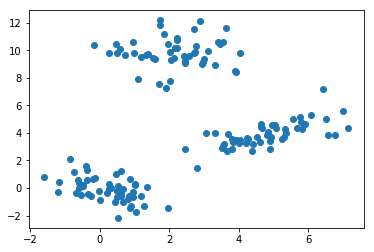

In [147]:
plt.scatter(data[:,0], data[:,1])

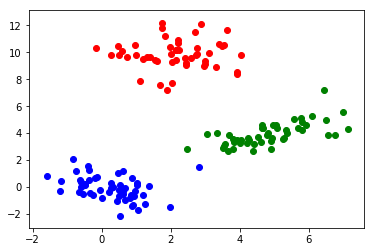

In [171]:
plt.figure()
for (i, label) in enumerate(cluster):
    if label == 0:
        plt.scatter(data[i, 0], data[i, 1], c='red')
    elif label == 1:
        plt.scatter(data[i, 0], data[i, 1], c='blue')
    elif label == 2:
         plt.scatter(data[i, 0], data[i, 1], c='green')
plt.show()